In [7]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /jobfs/114028264.gadi-pbs/matplotlib-oxcqneni because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [8]:
# Example data
data1 = np.array([1, 2, 2, 3, 4, 4, 4, 5])
data2 = np.array([2, 2, 3, 3, 4, 5, 5, 6])

In [9]:
# Calculate histograms
histogram1, bins1 = np.histogram(data1, bins=np.arange(min(data1), max(data1)+2))
histogram2, bins2 = np.histogram(data2, bins=np.arange(min(data2), max(data2)+2))

In [14]:
histogram1, histogram2

(array([1, 2, 1, 3, 1]), array([2, 2, 1, 2, 1]))

In [15]:
overlap_values = np.minimum(histogram1, histogram2)
overlap_values

array([1, 2, 1, 2, 1])

In [1]:


# Find the minimum value for each bin

# Calculate the total overlap
overlap = np.sum(overlap_values)

print("Overlap between the two distributions:", overlap)


Overlap between the two distributions: 7


In [16]:

# Calculate the total number of points in both distributions
total_points = len(data1) + len(data2)

# Calculate the percentage overlap
percentage_overlap = (overlap / total_points) * 100

percentage_overlap

# Integrals

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [ ]:
# Example data
data1 = np.array([1, 2, 2, 3, 4, 4, 4, 5])
data2 = np.array([2, 2, 3, 3, 4, 5, 5, 6])

In [22]:
# Define functions for the two distributions
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [23]:
# Fit the distributions to the data
popt1, pcov1 = curve_fit(gaussian, data1, np.zeros_like(data1) + 1)
popt2, pcov2 = curve_fit(gaussian, data2, np.zeros_like(data2) + 1)

In [24]:
# Calculate the range for x values
x = np.linspace(min(data1.min(), data2.min()), max(data1.max(), data2.max()), 1000)

In [25]:
# Calculate the PDFs for the two fitted distributions
pdf1 = gaussian(x, *popt1)
pdf2 = gaussian(x, *popt2)

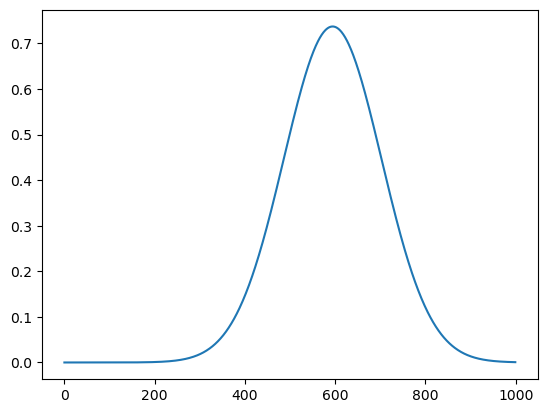

In [34]:
plt.plot(pdf1)

In [26]:
# Find the minimum PDF at each point
overlap_values = np.minimum(pdf1, pdf2)

In [27]:
# Calculate the total overlap (approximate using the integral)
overlap_integral = np.trapz(overlap_values, x)

In [29]:
overlap_integral

0.17502969319519662

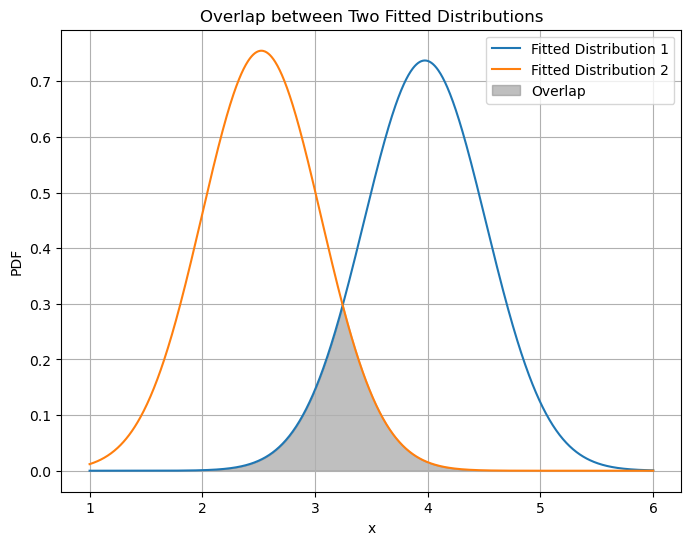

Overlap Integral (approximated): 0.17502969319519662


In [28]:
# Plot the two distributions and the overlap
plt.figure(figsize=(8, 6))
plt.plot(x, pdf1, label='Fitted Distribution 1')
plt.plot(x, pdf2, label='Fitted Distribution 2')
plt.fill_between(x, overlap_values, alpha=0.5, color='gray', label='Overlap')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Overlap between Two Fitted Distributions')
plt.legend()
plt.grid(True)
plt.show()

print("Overlap Integral (approximated):", overlap_integral)


# Kernal Density Estime

In [55]:
from scipy.stats import gaussian_kde

In [107]:
data = np.random.normal(0, 2, 50000) + 5*np.random.randint(200)

In [108]:
data2 = data+5

In [109]:
xmin = np.min(data); xmax=np.max(data2)

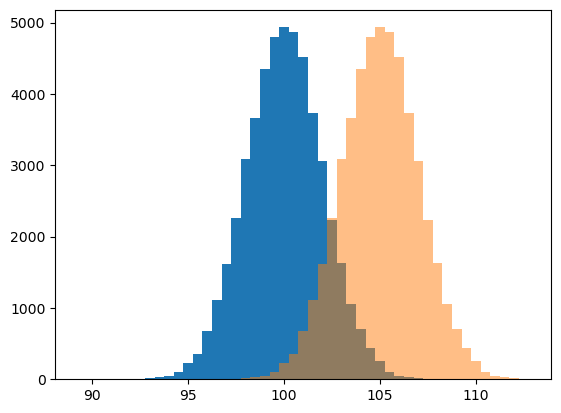

In [111]:
plt.hist(data,bins=np.arange(xmin, xmax, 0.5));
plt.hist(data2, bins=np.arange(xmin, xmax, 0.5), alpha=.5);

In [112]:
x = np.linspace(xmin, xmax, 10000)

In [113]:
kde1 = gaussian_kde(data)
kde2 = gaussian_kde(data2)

In [114]:
kde_vals1 = kde1(x)
kde_vals2 = kde2(x)

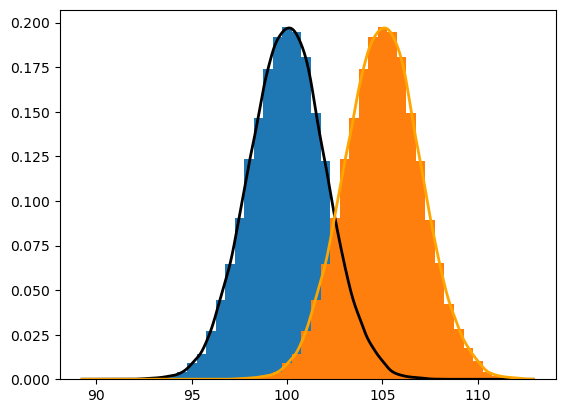

In [115]:
plt.plot(x, kde_vals1, 'k', linewidth=2)
plt.plot(x, kde_vals2, 'orange', linewidth=2)

plt.hist(data, bins=np.arange(xmin, xmax, 0.5), density=True);
plt.hist(data2, bins=np.arange(xmin, xmax, 0.5), density=True);

In [133]:
overlap_shape = np.min(np.vstack([kde_vals2,kde_vals1]), axis=0)

In [134]:
overlap_shape.shape

(10000,)

In [139]:
area1 = np.trapz(kde_vals1, x)

In [140]:
area2 = np.trapz(kde_vals2, x)

In [141]:
overlap_area = np.trapz(overlap_shape, x)

In [143]:
overlap_percent = overlap_area/(area1+area2) * 100

In [144]:
overlap_percent

10.740058937104425